In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 


In [57]:
data = pd.read_csv("C:/Users/Alankrita Klement/Downloads/heart.csv")
data.shape

(918, 12)

In [14]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [59]:

data["ChestPainType"].replace({"ASY":1,"ATA":2,"NAP":3,"TA":4},inplace = True)
data["RestingECG"].replace({"LVH":1,"Normal":2,"ST":3},inplace = True)
data["ExerciseAngina"].replace({"Y":1,"N":0},inplace =True)
data["ST_Slope"].replace({"Up":1,"Flat":2,"Down":3},inplace = True)
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,2,140,289,0,2,172,0,0.0,1,0
1,49,1,3,160,180,0,2,156,0,1.0,2,1
2,37,1,2,130,283,0,3,98,0,0.0,1,0
3,48,1,1,138,214,0,2,108,1,1.5,2,1
4,54,1,3,150,195,0,2,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,4,110,264,0,2,132,0,1.2,2,1
914,68,1,1,144,193,1,2,141,0,3.4,2,1
915,57,1,1,130,131,0,2,115,1,1.2,2,1
916,57,1,2,130,236,0,1,174,0,0.0,2,1


<AxesSubplot:xlabel='ST_Slope', ylabel='Density'>

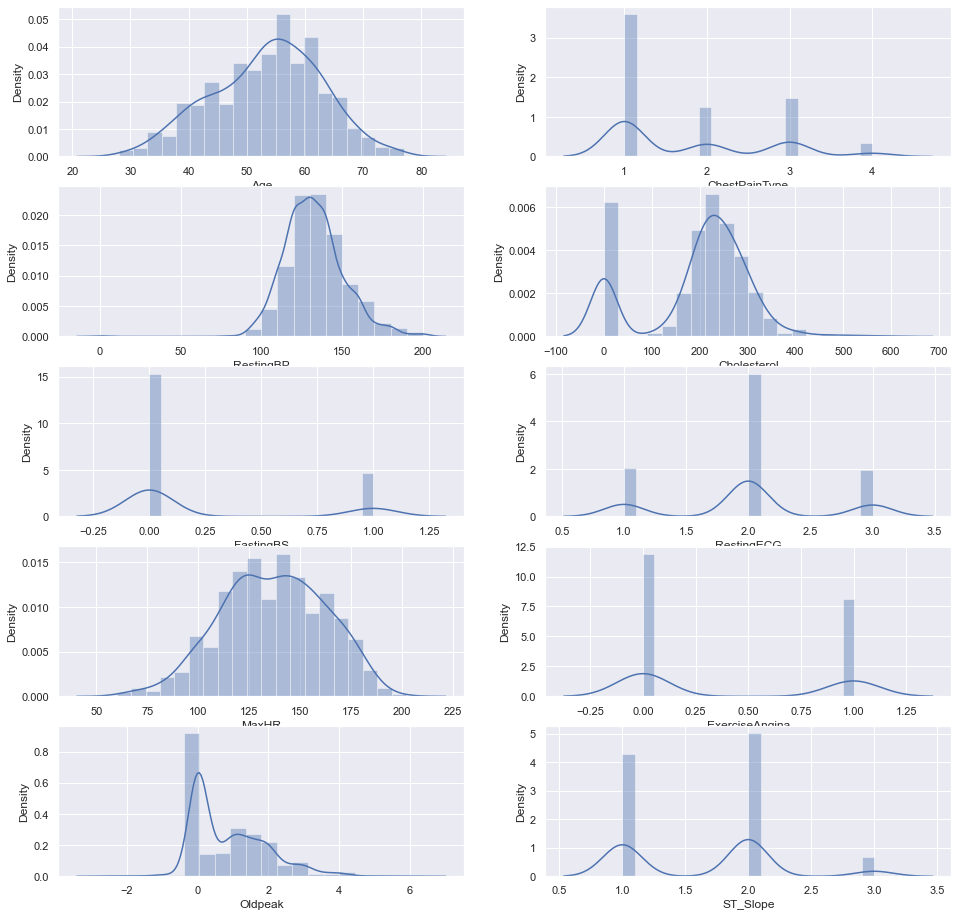

In [60]:
f ,ax = plt.subplots(5,2, figsize =(16,16))

sns.distplot( data.Age , bins = 20 , ax=ax[0,0])
sns.distplot(data.ChestPainType , bins = 20, ax=ax[0,1])
sns.distplot(data.RestingBP, bins = 20, ax=ax[1,0])
sns.distplot(data.Cholesterol, bins = 20, ax=ax[1,1])
sns.distplot(data.FastingBS, bins = 20, ax=ax[2,0])
sns.distplot(data.RestingECG, bins = 20, ax=ax[2,1])
sns.distplot(data.MaxHR, bins = 20, ax=ax[3,0])
sns.distplot(data.ExerciseAngina, bins = 20, ax=ax[3,1])
sns.distplot(data.Oldpeak, bins = 20, ax=ax[4,0])
sns.distplot(data.ST_Slope, bins = 20, ax=ax[4,1])

<AxesSubplot:>

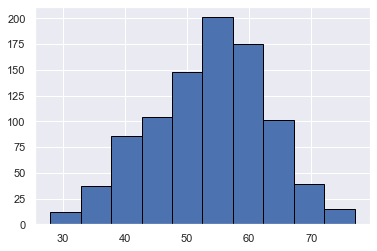

In [61]:
data["Age"].hist(edgecolor = "Black")

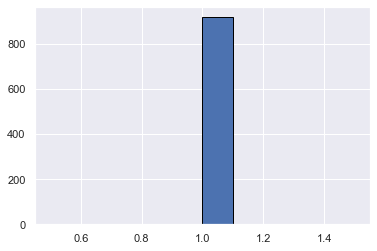

In [62]:
data["Sex"].hist(edgecolor = "Black")
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

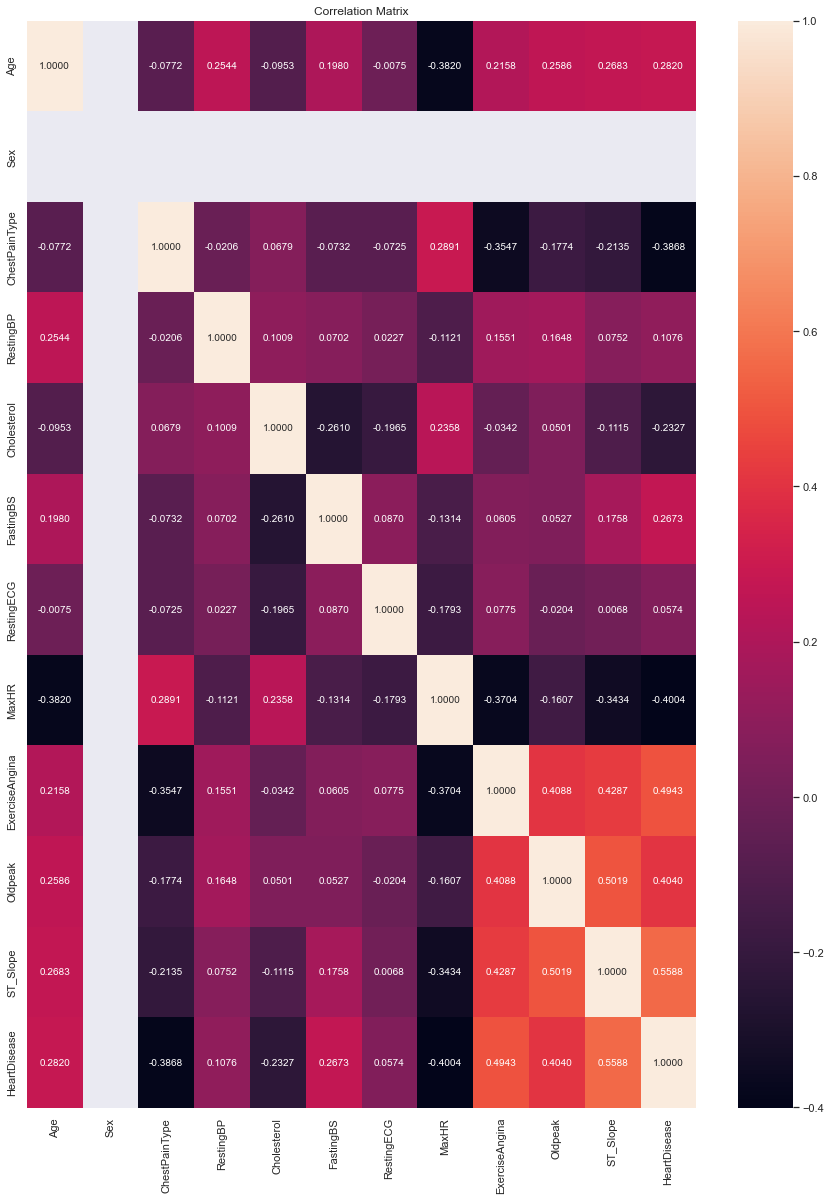

In [63]:
f,ax =plt.subplots(figsize = [15,20])
sns.heatmap(data.corr() , annot = True , fmt=".4f")
#data.insert("Sex" )
ax.set_title("Correlation Matrix")


In [64]:
data.isnull()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
913,False,False,False,False,False,False,False,False,False,False,False,False
914,False,False,False,False,False,False,False,False,False,False,False,False
915,False,False,False,False,False,False,False,False,False,False,False,False
916,False,False,False,False,False,False,False,False,False,False,False,False


In [66]:
from sklearn.model_selection import train_test_split

input_values = ["Age","Sex","ChestPainType","RestingBP","Cholesterol","FastingBS","RestingECG","MaxHR","ExerciseAngina","Oldpeak","ST_Slope"]
target_var = ["HeartDisease"]

X=data[input_values].values
y=data[target_var].values
test_split_size = 0.40

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = test_split_size , random_state = 42)


In [68]:
train_val = (1.0*len(X_train))/(1.0*len(data))
test_val = (1.0*len(X_test))/(1.0*len(data))

print(" Training_set:{0:0.2f}%".format(train_val*100))
print("Testing_set:{0:0.2f}%" .format(test_val*100))

 Training_set:59.91%
Testing_set:40.09%


In [69]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr_model = LogisticRegression( C= 0.7 , random_state = 42)
lr_model.fit(X_train,y_train.ravel())
lr_predict = lr_model.predict(X_test)

print("Accuracy : {0:0.2f}" .format(metrics.accuracy_score(y_test,lr_predict)*100))

print("Confusion Matrix")

print(metrics.confusion_matrix(y_test,lr_predict,labels =[1,0]))

print("Classification Report")

print(metrics.classification_report(y_test,lr_predict,labels =[1,0]))

Accuracy : 82.88
Confusion Matrix
[[177  44]
 [ 19 128]]
Classification Report
              precision    recall  f1-score   support

           1       0.90      0.80      0.85       221
           0       0.74      0.87      0.80       147

    accuracy                           0.83       368
   macro avg       0.82      0.84      0.83       368
weighted avg       0.84      0.83      0.83       368



In [72]:
#Support Vector Classification

from sklearn.svm import SVC

svm_model = SVC(kernel = "linear" ,C=1, random_state = 1)
svm_model.fit(X_train,y_train.ravel())
svm_predict = svm_model.predict(X_test)
svm_prediction = svm_model.predict(X_train)

print("Accuracy_of_trained_data : {0:0.2f}".format(metrics.accuracy_score(y_train,svm_prediction)*100))

print("Accuracy : {0:0.2f}" .format(metrics.accuracy_score(y_test,svm_predict)*100))

print("Confusion Matrix")

print(metrics.confusion_matrix(y_test,svm_predict,labels =[1,0]))

print("Classification Report")

print(metrics.classification_report(y_test,svm_predict,labels =[1,0]))

Accuracy_of_trained_data : 84.18
Accuracy : 84.24
Confusion Matrix
[[184  37]
 [ 21 126]]
Classification Report
              precision    recall  f1-score   support

           1       0.90      0.83      0.86       221
           0       0.77      0.86      0.81       147

    accuracy                           0.84       368
   macro avg       0.84      0.84      0.84       368
weighted avg       0.85      0.84      0.84       368



In [74]:
from sklearn.tree import DecisionTreeClassifier

dt_model =DecisionTreeClassifier(random_state = 1)
dt_model.fit(X_train,y_train.ravel())
dt_model_predict = dt_model.predict(X_test)
training_set_prediction=dt_model.predict(X_train)


print("Accuracy_of_trained_data : {0:0.2f}".format(metrics.accuracy_score(y_train,training_set_prediction)*100))

print("Accuracy : {0:0.2f}" .format(metrics.accuracy_score(y_test,dt_model_predict)*100))

print("Confusion Matrix")

print(metrics.confusion_matrix(y_test,dt_model_predict,labels =[1,0]))

print("Classification Report")

print(metrics.classification_report(y_test,dt_model_predict,labels =[1,0]))


Accuracy_of_trained_data : 100.00
Accuracy : 79.89
Confusion Matrix
[[168  53]
 [ 21 126]]
Classification Report
              precision    recall  f1-score   support

           1       0.89      0.76      0.82       221
           0       0.70      0.86      0.77       147

    accuracy                           0.80       368
   macro avg       0.80      0.81      0.80       368
weighted avg       0.81      0.80      0.80       368



In [75]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators = 10, criterion ="entropy", random_state=1)
rf_model.fit(X_train,y_train.ravel())
rf_model_predict = rf_model.predict(X_test)
training_set_prediction=rf_model.predict(X_train)


print("Accuracy_of_trained_data : {0:0.2f}".format(metrics.accuracy_score(y_train,training_set_prediction)))

print("Accuracy : {0:0.2f}" .format(metrics.accuracy_score(y_test,rf_model_predict)*100))

print("Confusion Matrix")

print(metrics.confusion_matrix(y_test,rf_model_predict,labels =[1,0]))

print("Classification Report")

print(metrics.classification_report(y_test,rf_model_predict,labels =[1,0]))


Accuracy_of_trained_data : 0.99
Accuracy : 82.88
Confusion Matrix
[[172  49]
 [ 14 133]]
Classification Report
              precision    recall  f1-score   support

           1       0.92      0.78      0.85       221
           0       0.73      0.90      0.81       147

    accuracy                           0.83       368
   macro avg       0.83      0.84      0.83       368
weighted avg       0.85      0.83      0.83       368



In [77]:
from sklearn.neighbors import KNeighborsClassifier

kn_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski' ,p=2)
kn_model.fit(X_train,y_train.ravel())
kn_model_prediction = kn_model.predict(X_test)
training_set_prediction_Accuracy = kn_model.predict(X_train)

print("Accuracy_of_trained_data : {0:0.2f}".format(metrics.accuracy_score(y_train,training_set_prediction_Accuracy)*100))

print("Accuracy : {0:0.2f}" .format(metrics.accuracy_score(y_test,kn_model_prediction)*100))

print("Confusion Matrix")

print(metrics.confusion_matrix(y_test,kn_model_prediction,labels =[1,0]))

print("Classification Report")

print(metrics.classification_report(y_test,kn_model_prediction,labels =[1,0]))

Accuracy_of_trained_data : 78.36
Accuracy : 70.65
Confusion Matrix
[[168  53]
 [ 55  92]]
Classification Report
              precision    recall  f1-score   support

           1       0.75      0.76      0.76       221
           0       0.63      0.63      0.63       147

    accuracy                           0.71       368
   macro avg       0.69      0.69      0.69       368
weighted avg       0.71      0.71      0.71       368



In [78]:
from sklearn.naive_bayes import GaussianNB

gnb_model = GaussianNB()

gnb_model.fit(X_train,y_train.ravel())

gnb_model_predict = gnb_model.predict(X_test)

training_data_accuracy = gnb_model.predict(X_train)

print("Accuracy_of_trained_data : {0:0.2f}".format(metrics.accuracy_score(y_train,training_data_accuracy)*100))

print("Accuracy : {0:0.2f}" .format(metrics.accuracy_score(y_test,gnb_model_predict)*100))

print("Confusion Matrix")

print(metrics.confusion_matrix(y_test,gnb_model_predict,labels =[1,0]))

print("Classification Report")

print(metrics.classification_report(y_test,gnb_model_predict,labels =[1,0]))

Accuracy_of_trained_data : 84.00
Accuracy : 86.96
Confusion Matrix
[[187  34]
 [ 14 133]]
Classification Report
              precision    recall  f1-score   support

           1       0.93      0.85      0.89       221
           0       0.80      0.90      0.85       147

    accuracy                           0.87       368
   macro avg       0.86      0.88      0.87       368
weighted avg       0.88      0.87      0.87       368

